# Activity 1: IPython i Jupyter

Zademonstrujmy powszechny rozwój języka Python w IPython i Jupyter. Zaimportujemy NumPy,
zdefiniuj funkcję i iteruj wyniki.

1. Aby zaimportować NumPy, użyj:

In [2]:
import numpy as np

2. Utwórz funkcję kwadratPlus(x,c), która obliczy wartość: y=x^2+c

In [3]:
def squarePlus(x,c):
    y = x^2 + c
    return y

3. Uruchom swój kod w IPythonie i Jupyterze

In [4]:
squarePlus(2,1)

1

# Activity 2: Praca z problemami z danymi

Przed rozpoczęciem analizy musimy sprawdzić, czy nie występują problemy z danymi, a kiedy je znajdziemy (co jest bardzo powszechne!), musimy rozwiązać problemy, przekształcając ramkę DataFrame. Można to zrobić w jeden sposób oznacza to na przykład zastosowanie funkcji do kolumny lub całej ramki DataFrame. Jest to powszechne niektóre liczby w ramce danych po jej odczytaniu nie są poprawnie konwertowane na liczby zmiennoprzecinkowe liczby. Rozwiążmy ten problem, stosując funkcje:

1. Zaimportuj Pandas i bibliotekę numpy.

In [5]:
import pandas as pd
import numpy as np

2. Przeczytaj zbiór danych RadNet udostępniony przez Agencję Ochrony Środowiska Stanów Zjednoczonych.

In [6]:
df = pd.read_csv('RadNet_Laboratory_Analysis.csv')
df.head()

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.088,Non-detect,Non-detect,NaN,NaN,Non-detect
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.055,Non-detect,Non-detect,NaN,NaN,Non-detect
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,0.0057,NaN,0.0074,0.067,Non-detect,Non-detect,NaN,NaN,0.0043
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.096,Non-detect,Non-detect,NaN,NaN,Non-detect
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3,Non-detect,Non-detect,Non-detect,NaN,Non-detect,0.22,Non-detect,Non-detect,NaN,NaN,Non-detect


3. Utwórz listę z kolumnami numerycznymi dla radionuklidów w zbiorze danych RadNet.

In [7]:
df.dtypes

State             object
Location          object
Date Posted       object
Date Collected    object
Sample Type       object
Unit              object
Ba-140            object
Co-60             object
Cs-134            object
Cs-136            object
Cs-137            object
I-131             object
I-132             object
I-133             object
Te-129            object
Te-129m           object
Te-132            object
dtype: object

In [8]:
columns = df.columns
id_cols = ['State', 'Location', 'Date Posted', 'Date Collected', 'Sample Type', 'Unit']
columns = list(set(columns)-set(id_cols))
columns

['I-132',
 'Cs-136',
 'Co-60',
 'Te-132',
 'Ba-140',
 'Cs-137',
 'I-131',
 'I-133',
 'Cs-134',
 'Te-129m',
 'Te-129']

4. Użyj metody Apply w jednej kolumnie z funkcją lambda, która porównuje wartość Brak wykrycia
strunowy

In [9]:
# lambda
func = lambda x: x**2 if x>10 else x
func(29)

841

In [10]:
df['Cs-134'] = df['Cs-134'].apply(lambda x: np.nan if ((x=='Non-detect') | (x=='ND')) else x)
df['Cs-134'].head()

0       NaN
1       NaN
2    0.0057
3       NaN
4       NaN
Name: Cs-134, dtype: object

5. Użyj metody Applymap, aby zamienić wartości tekstowe „Non-detect” na .np.nan we wszystkich numerach
kolumn na raz, zrób to samo z wartością „ND”.

In [11]:
df.loc[:,columns] = df.loc[:,columns].applymap(lambda x: np.nan if ((x=='Non-detect') | (x=='ND')) else x)
df.loc[:,columns].head()

/tmp/ipykernel_1317/1917651076.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:,columns] = df.loc[:,columns].applymap(lambda x: np.nan if ((x=='Non-detect') | (x=='ND')) else x)


,I-132,Cs-136,Co-60,Te-132,Ba-140,Cs-137,I-131,I-133,Cs-134,Te-129m,Te-129
0,NaN,NaN,NaN,NaN,NaN,NaN,0.088,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.055,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0043,NaN,0.0074,0.067,NaN,0.0057,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.22,NaN,NaN,NaN,NaN


6. Użyj tej samej metody Applymap, aby usunąć wszystkie spacje (od początku i końca) we wszystkich pozostałych
kolumny (nienumeryczne). Użyj metody strip(), aby usunąć spacje.

In [12]:
df.loc[:,id_cols] = df.loc[:,id_cols].applymap(lambda x: x.strip())
df.loc[:,id_cols].head()

/tmp/ipykernel_1317/2596169239.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:,id_cols] = df.loc[:,id_cols].applymap(lambda x: x.strip())


,State,Location,Date Posted,Date Collected,Sample Type,Unit
0,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3
1,ID,Boise,03/30/2011,03/23/2011,Air Filter,pCi/m3
2,AK,Juneau,03/30/2011,03/23/2011,Air Filter,pCi/m3
3,AK,Nome,03/30/2011,03/22/2011,Air Filter,pCi/m3
4,AK,Nome,03/30/2011,03/23/2011,Air Filter,pCi/m3


Dodatkowo:
7. Zmień typy danych kolumn za pomocą metod (użyj df.dtypes() do sprawdzenia typów danych):

pd.to_datetime()
pd.to_numeric()

In [13]:
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Date Collected'] = pd.to_datetime(df['Date Collected'])
for col in columns:
    df[col] = pd.to_numeric(df[col])
df.dtypes

State                     object
Location                  object
Date Posted       datetime64[ns]
Date Collected    datetime64[ns]
Sample Type               object
Unit                      object
Ba-140                   float64
Co-60                    float64
Cs-134                   float64
Cs-136                   float64
Cs-137                   float64
I-131                    float64
I-132                    float64
I-133                    float64
Te-129                   float64
Te-129m                  float64
Te-132                   float64
dtype: object

In [14]:
df

,State,Location,Date Posted,Date Collected,Sample Type,Unit,Ba-140,Co-60,Cs-134,Cs-136,Cs-137,I-131,I-132,I-133,Te-129,Te-129m,Te-132
0,ID,Boise,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.088,NaN,NaN,NaN,NaN,NaN
1,ID,Boise,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.055,NaN,NaN,NaN,NaN,NaN
2,AK,Juneau,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,0.0057,NaN,0.0074,0.067,NaN,NaN,NaN,NaN,0.0043
3,AK,Nome,2011-03-30,2011-03-22,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,NaN,NaN
4,AK,Nome,2011-03-30,2011-03-23,Air Filter,pCi/m3,NaN,NaN,NaN,NaN,NaN,0.220,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,CA,Richmond,2011-04-25,2011-04-14,Precipitation,pCi/l,NaN,NaN,8.9000,NaN,7.9000,5.900,NaN,NaN,NaN,NaN,NaN
602,CA,Richmond,2011-05-24,2011-04-28,Precipitation,pCi/l,NaN,NaN,6.6000,NaN,5.8000,NaN,NaN,NaN,NaN,NaN,NaN
603,UT,Salt Lake City,2011-05-24,2011-04-14,Precipitation,pCi/l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,UT,Salt Lake City,2011-05-24,2011-04-28,Precipitation,pCi/l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Ćwiczenie 3. Wykreślanie danych za pomocą Pandas

1. Skorzystaj z RadNet DataFrame, z którym pracowaliśmy.

2. Jak widzieliśmy wcześniej, napraw wszystkie problemy z typami danych.

3. Utwórz wykres z filtrem według lokalizacji, wybierając miasto San Bernardino i jedno radionuklid, z osią x ustawioną na datę i osią y z radionuklidem I-131.

<Axes: xlabel='Date Collected'>

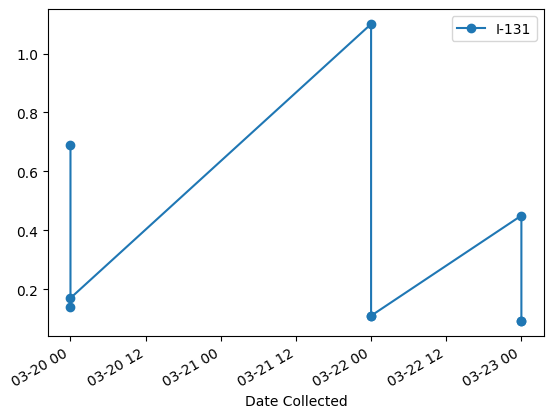

In [15]:
df.loc[df.Location == 'San Bernardino'].plot(x='Date Collected', y='I-131', marker='o')

4. Utwórz wykres za pomocą pliku matplotlib.plt - w stylu Matlab - z koncentracją dwóch powiązanych radionuklidy I-131 i I-132.

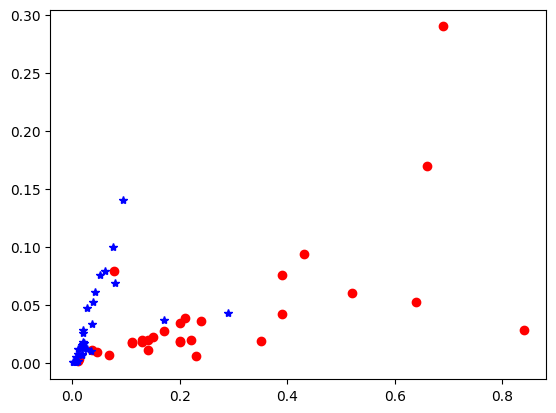

In [18]:
import matplotlib.pyplot as plt

plt.plot(df['I-131'], df['I-132'], 'ro')
plt.plot(df['I-132'],df['Cs-134'],'b*')

5. Utwórz wykres punktowy ze stężeniami dwóch powiązanych radionuklidów, I-131 i I-132:

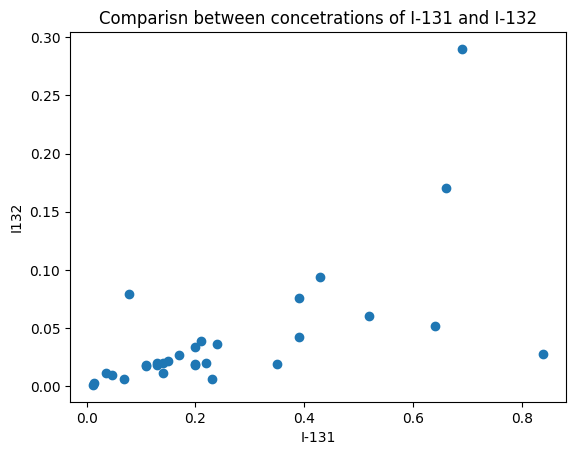

In [19]:
ig, ax = plt.subplots()
ax.scatter(x=df['I-131'], y=df['I-132'])
_ = ax.set(
    xlabel='I-131',
    ylabel='I132',
    title='Comparisn between concetrations of I-131 and I-132'
)

# Ćwiczenie 4: Wykresy liniowe z obiektowym API i Pandas Ramki danych

W tym ćwiczeniu najpierw utworzymy wykres liniowy szeregów czasowych na podstawie zbioru danych pliku „cars.data”. Przykład kreślenia przy użyciu pand i obiektowego API. Ten rodzaj wykresu jest powszechny w
analizy i pomaga odpowiedzieć na pytania takie jak „czy średnia moc wzrasta, czy maleje
z czasem?"

Teraz postępuj zgodnie z poniższymi procedurami, aby wykreślić wykres średniej mocy rocznej za pomocą Pandas i podczas korzystania z obiektowego API.

1. Zaimportuj wymagane biblioteki do notatnika Jupyter i odczytaj zbiór danych z pliku cars.data
repozytorium zbiorów danych: matplotlib, numpy, pandas. Załaduj dane do ramki danych pandy z pliku: samochody.data